# Стационарное уравнение теплопроводности в 2D

In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from tqdm import tqdm_notebook

## Начальные параметры

In [77]:
N = 30
T = np.zeros((N,N))
T = np.random.random((N,N))

dx = 0.1
dV = dx**2

T1 = 10
T0 = 0


L0 = 0.1
Lambda = np.full((N,N), L0)

b = 0
small = 1e-15


# Lambda[:10, :10] = 1e20
# T[1:9, 1:9] = 0

def refreshT():
    """
    Зададим граничные условия на температуру
    """
    
    T[0, :] = T1
    T[:, 0] = T0
    T[:, -1] = T0
    T[-1, :] = T0
    
#     T[1:9, 1:9] = 0

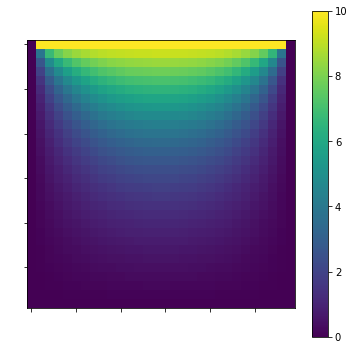

In [78]:
def geta(i,j):
    a_w = 2*Lambda[i,j-1]*Lambda[i,j]/(Lambda[i,j-1]+Lambda[i,j] + small) / dx
    a_n = 2*Lambda[i+1,j]*Lambda[i,j]/(Lambda[i+1,j]+Lambda[i,j] + small) / dx
    a_e = 2*Lambda[i,j+1]*Lambda[i,j]/(Lambda[i,j+1]+Lambda[i,j] + small) / dx
    a_s = 2*Lambda[i-1,j]*Lambda[i,j]/(Lambda[i-1,j]+Lambda[i,j] + small) / dx
    a_p = a_w + a_n + a_e + a_s  # - S_p*dV
    # b = S_c*dV
    
    return [a_w, a_n, a_e, a_s, a_p]


refreshT()

for _ in tqdm_notebook(range(120)): 
    T_prom = T.copy()
    for i in range(0,N-1):
        P = np.zeros(N)
        Q = np.zeros(N)
        Q[0] = T[i, 0]
        for j in range(0,N-1):            
            a_w, a_n, a_e, a_s, a_p = geta(i,j)

            P[j+1] = a_e / (a_p-a_w*P[j])
            Q[j+1] = (a_n*T[i+1,j]+a_s*T[i-1,j]+b + a_w*Q[j])/(a_p-a_w*P[j])

        for j in range(N-2, -1, -1):
            T_prom[i,j] = P[j+1]*T_prom[i,j+1]+Q[j+1]
            
    T = T_prom.copy()
    refreshT()

    for j in range(0,N-1):
        P = np.zeros(N)
        Q = np.zeros(N)
        Q[0] = T[0, j]
        for i in range(0,N-1):
            a_w, a_n, a_e, a_s, a_p = geta(i,j)

            P[i+1] = a_n / (a_p-a_s*P[i])
            Q[i+1] = (a_w*T[i,j-1]+a_e*T[i,j+1]+b + a_s*Q[i])/(a_p-a_s*P[i])

        for i in range(N-2, -1, -1):
            T_prom[i,j] = P[i+1]*T_prom[i+1,j]+Q[i+1]
            
    T = T_prom.copy()
    refreshT()
    
fig, ax = plt.subplots(figsize = (6,6))
picture = ax.imshow(T)
ax.tick_params(labelcolor='w')
fig.colorbar(picture)

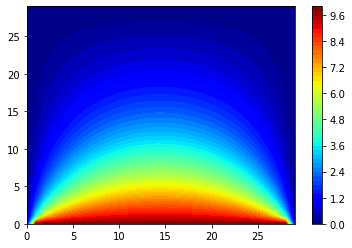

In [79]:
colorinterpolation = 50
colourMap = plt.cm.jet
plt.contourf(T, colorinterpolation, cmap=colourMap)
plt.colorbar()